## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Load Data

In [2]:
credit = pd.read_csv('cleaned_credit_data.csv')
pd.set_option("display.max_columns", 0)

In [3]:
## Analysis

In [4]:
# Examine data set
credit.head()

,limit,sex,education,marriage,age,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Information about data
credit.describe()

,limit,sex,education,marriage,age,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#Information about data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   limit         30000 non-null  int64
 1   sex           30000 non-null  int64
 2   education     30000 non-null  int64
 3   marriage      30000 non-null  int64
 4   age           30000 non-null  int64
 5   pay_hist_sep  30000 non-null  int64
 6   pay_hist_aug  30000 non-null  int64
 7   pay_hist_jul  30000 non-null  int64
 8   pay_hist_jun  30000 non-null  int64
 9   pay_hist_may  30000 non-null  int64
 10  pay_hist_apr  30000 non-null  int64
 11  bill_amt_sep  30000 non-null  int64
 12  bill_amt_aug  30000 non-null  int64
 13  bill_amt_jul  30000 non-null  int64
 14  bill_amt_jun  30000 non-null  int64
 15  bill_amt_may  30000 non-null  int64
 16  bill_amt_apr  30000 non-null  int64
 17  pay_amt_sep   30000 non-null  int64
 18  pay_amt_aug   30000 non-null  int64
 19  pay_amt_jul   30000 non-n

In [7]:
# Check for null values
credit.isnull().values.any()

False

In [8]:
# Data description states 0,4,5,6 values all represent "other" for education level.
# Recode education levels to combine 0,4,5,6 values as 0
credit.education = credit.education.replace(to_replace=[4,5,6], value=0)

In [9]:
# Column names
header = credit.dtypes.index
print(header)

Index(['limit', 'sex', 'education', 'marriage', 'age', 'pay_hist_sep',
       'pay_hist_aug', 'pay_hist_jul', 'pay_hist_jun', 'pay_hist_may',
       'pay_hist_apr', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul',
       'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may',
       'pay_amt_apr', 'default'],
      dtype='object')


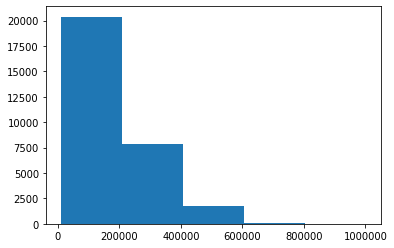

In [10]:
# Credit limit distribution
plt.hist(credit['limit'], bins=5)
plt.show()

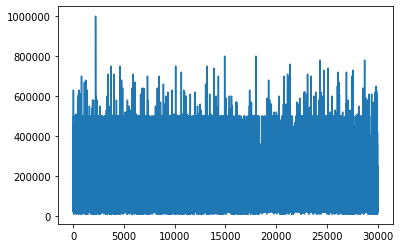

In [11]:
# Credit limit line  plot 
plt.plot(credit['limit'])
plt.show()

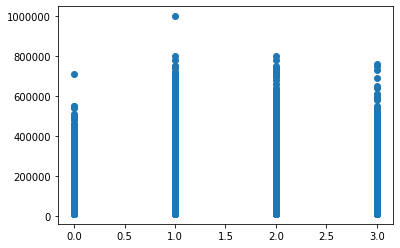

In [12]:
# Scatter plot - education vs credit limit correlation
x = credit['education']
y = credit['limit']
plt.scatter(x,y)
plt.show()

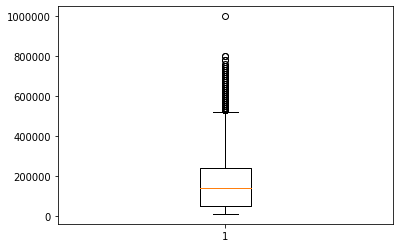

In [13]:
# Box plot - detecting credit limit outliers
A = credit['limit']
plt.boxplot(A)
plt.show()

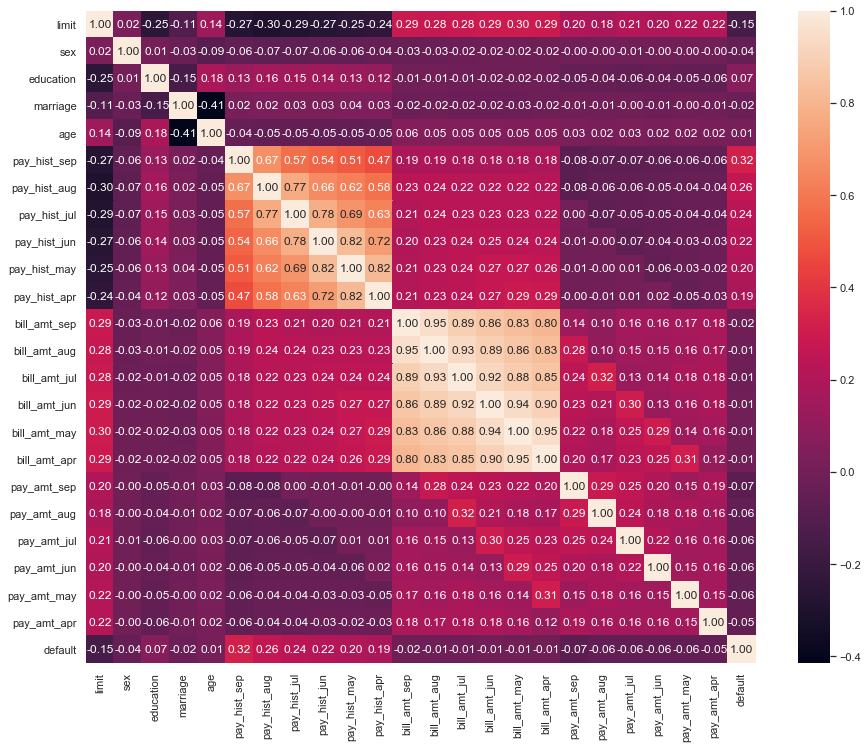

<Figure size 432x288 with 0 Axes>

In [14]:
# Correlation Matrix
corrMat = credit.corr()
plt.figure(figsize=(15,12))
sn.set(font_scale=1)
sn.heatmap(corrMat, annot=True, fmt=".2f")
plt.show()
plt.savefig('corrMat.png')

The correlation matrix suggests that the only strong correlation identified is between the billed amounts. 

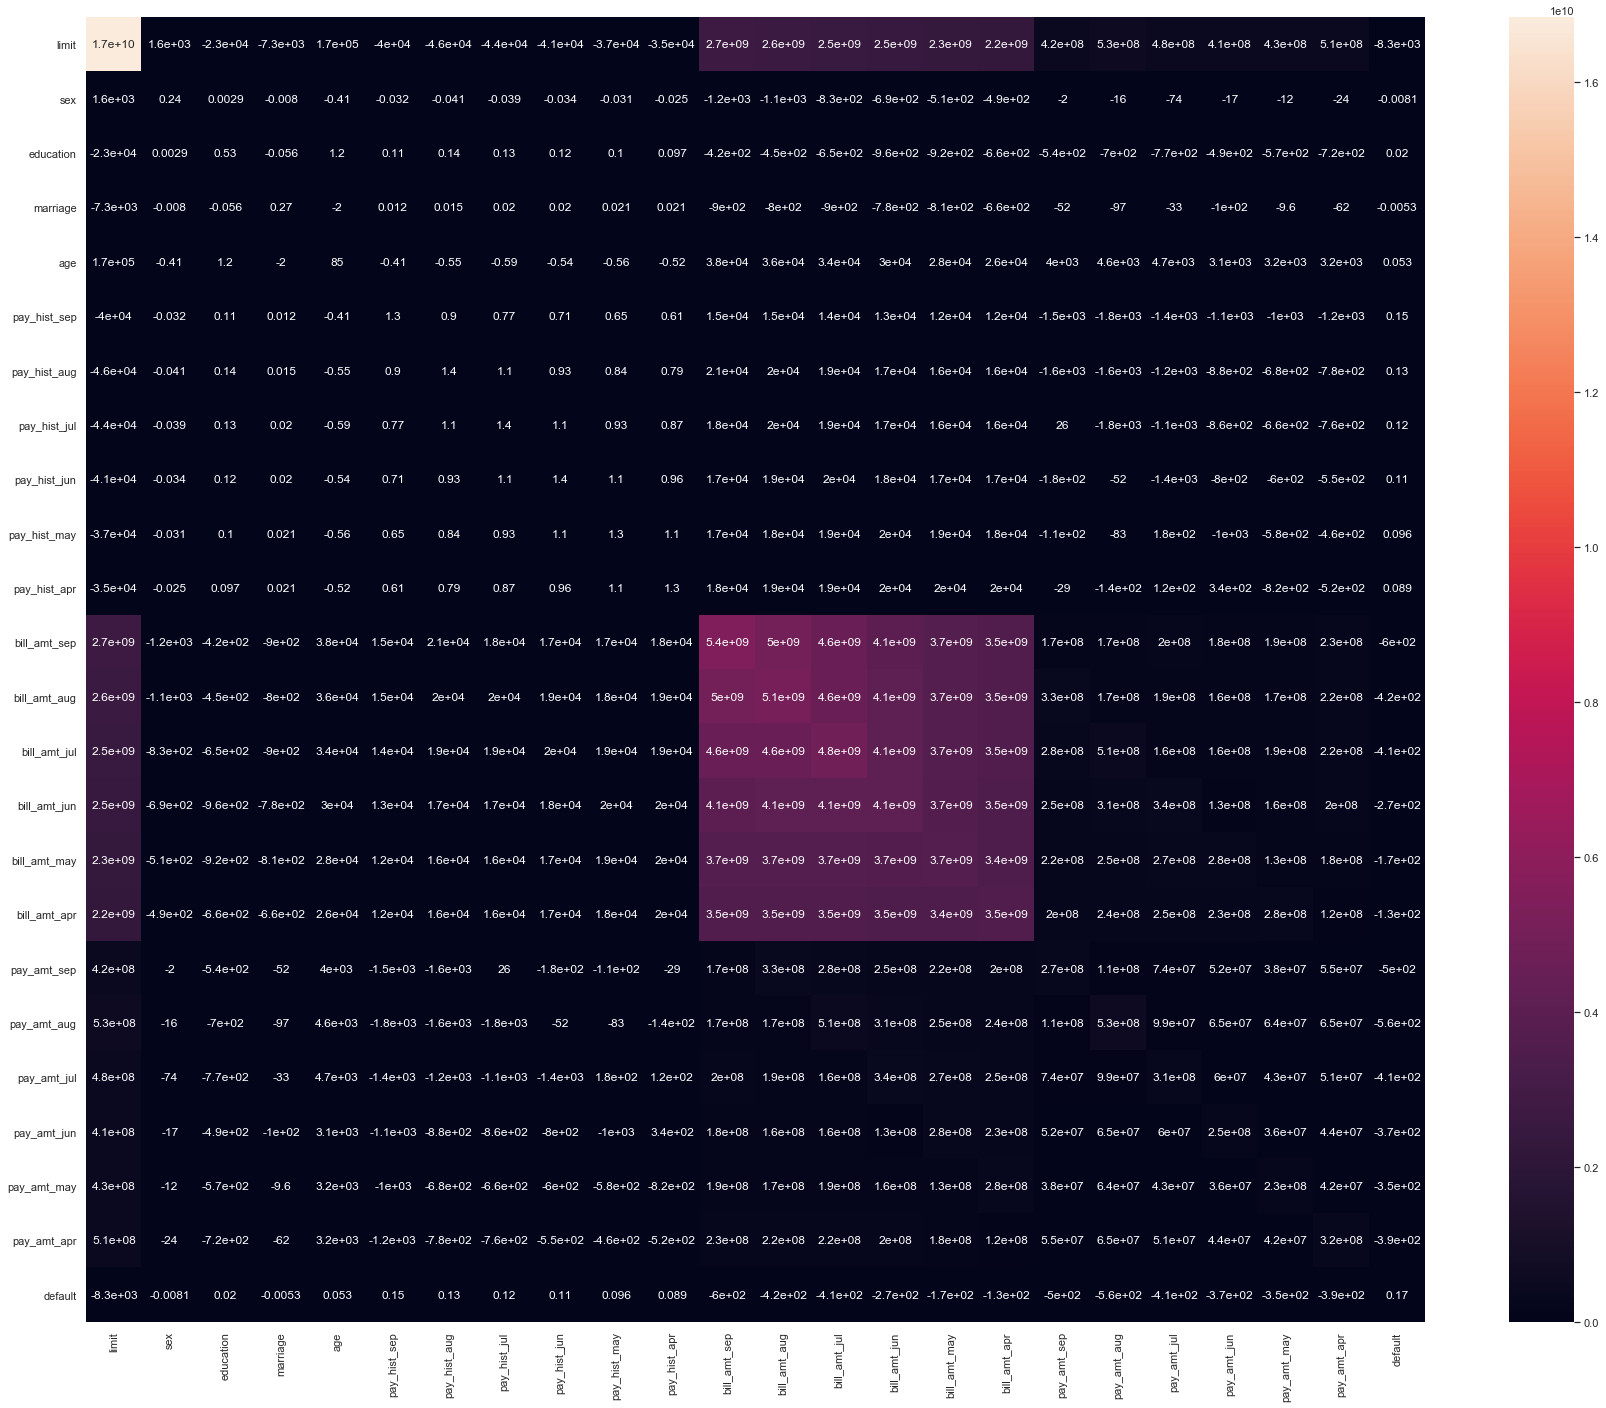

<Figure size 432x288 with 0 Axes>

In [15]:
# Covariance Matrix
covMat = credit.cov()
plt.figure(figsize=(30,24))
sn.set(font_scale=1)
sn.heatmap(covMat, annot=True)
plt.show()
plt.savefig('covMat')

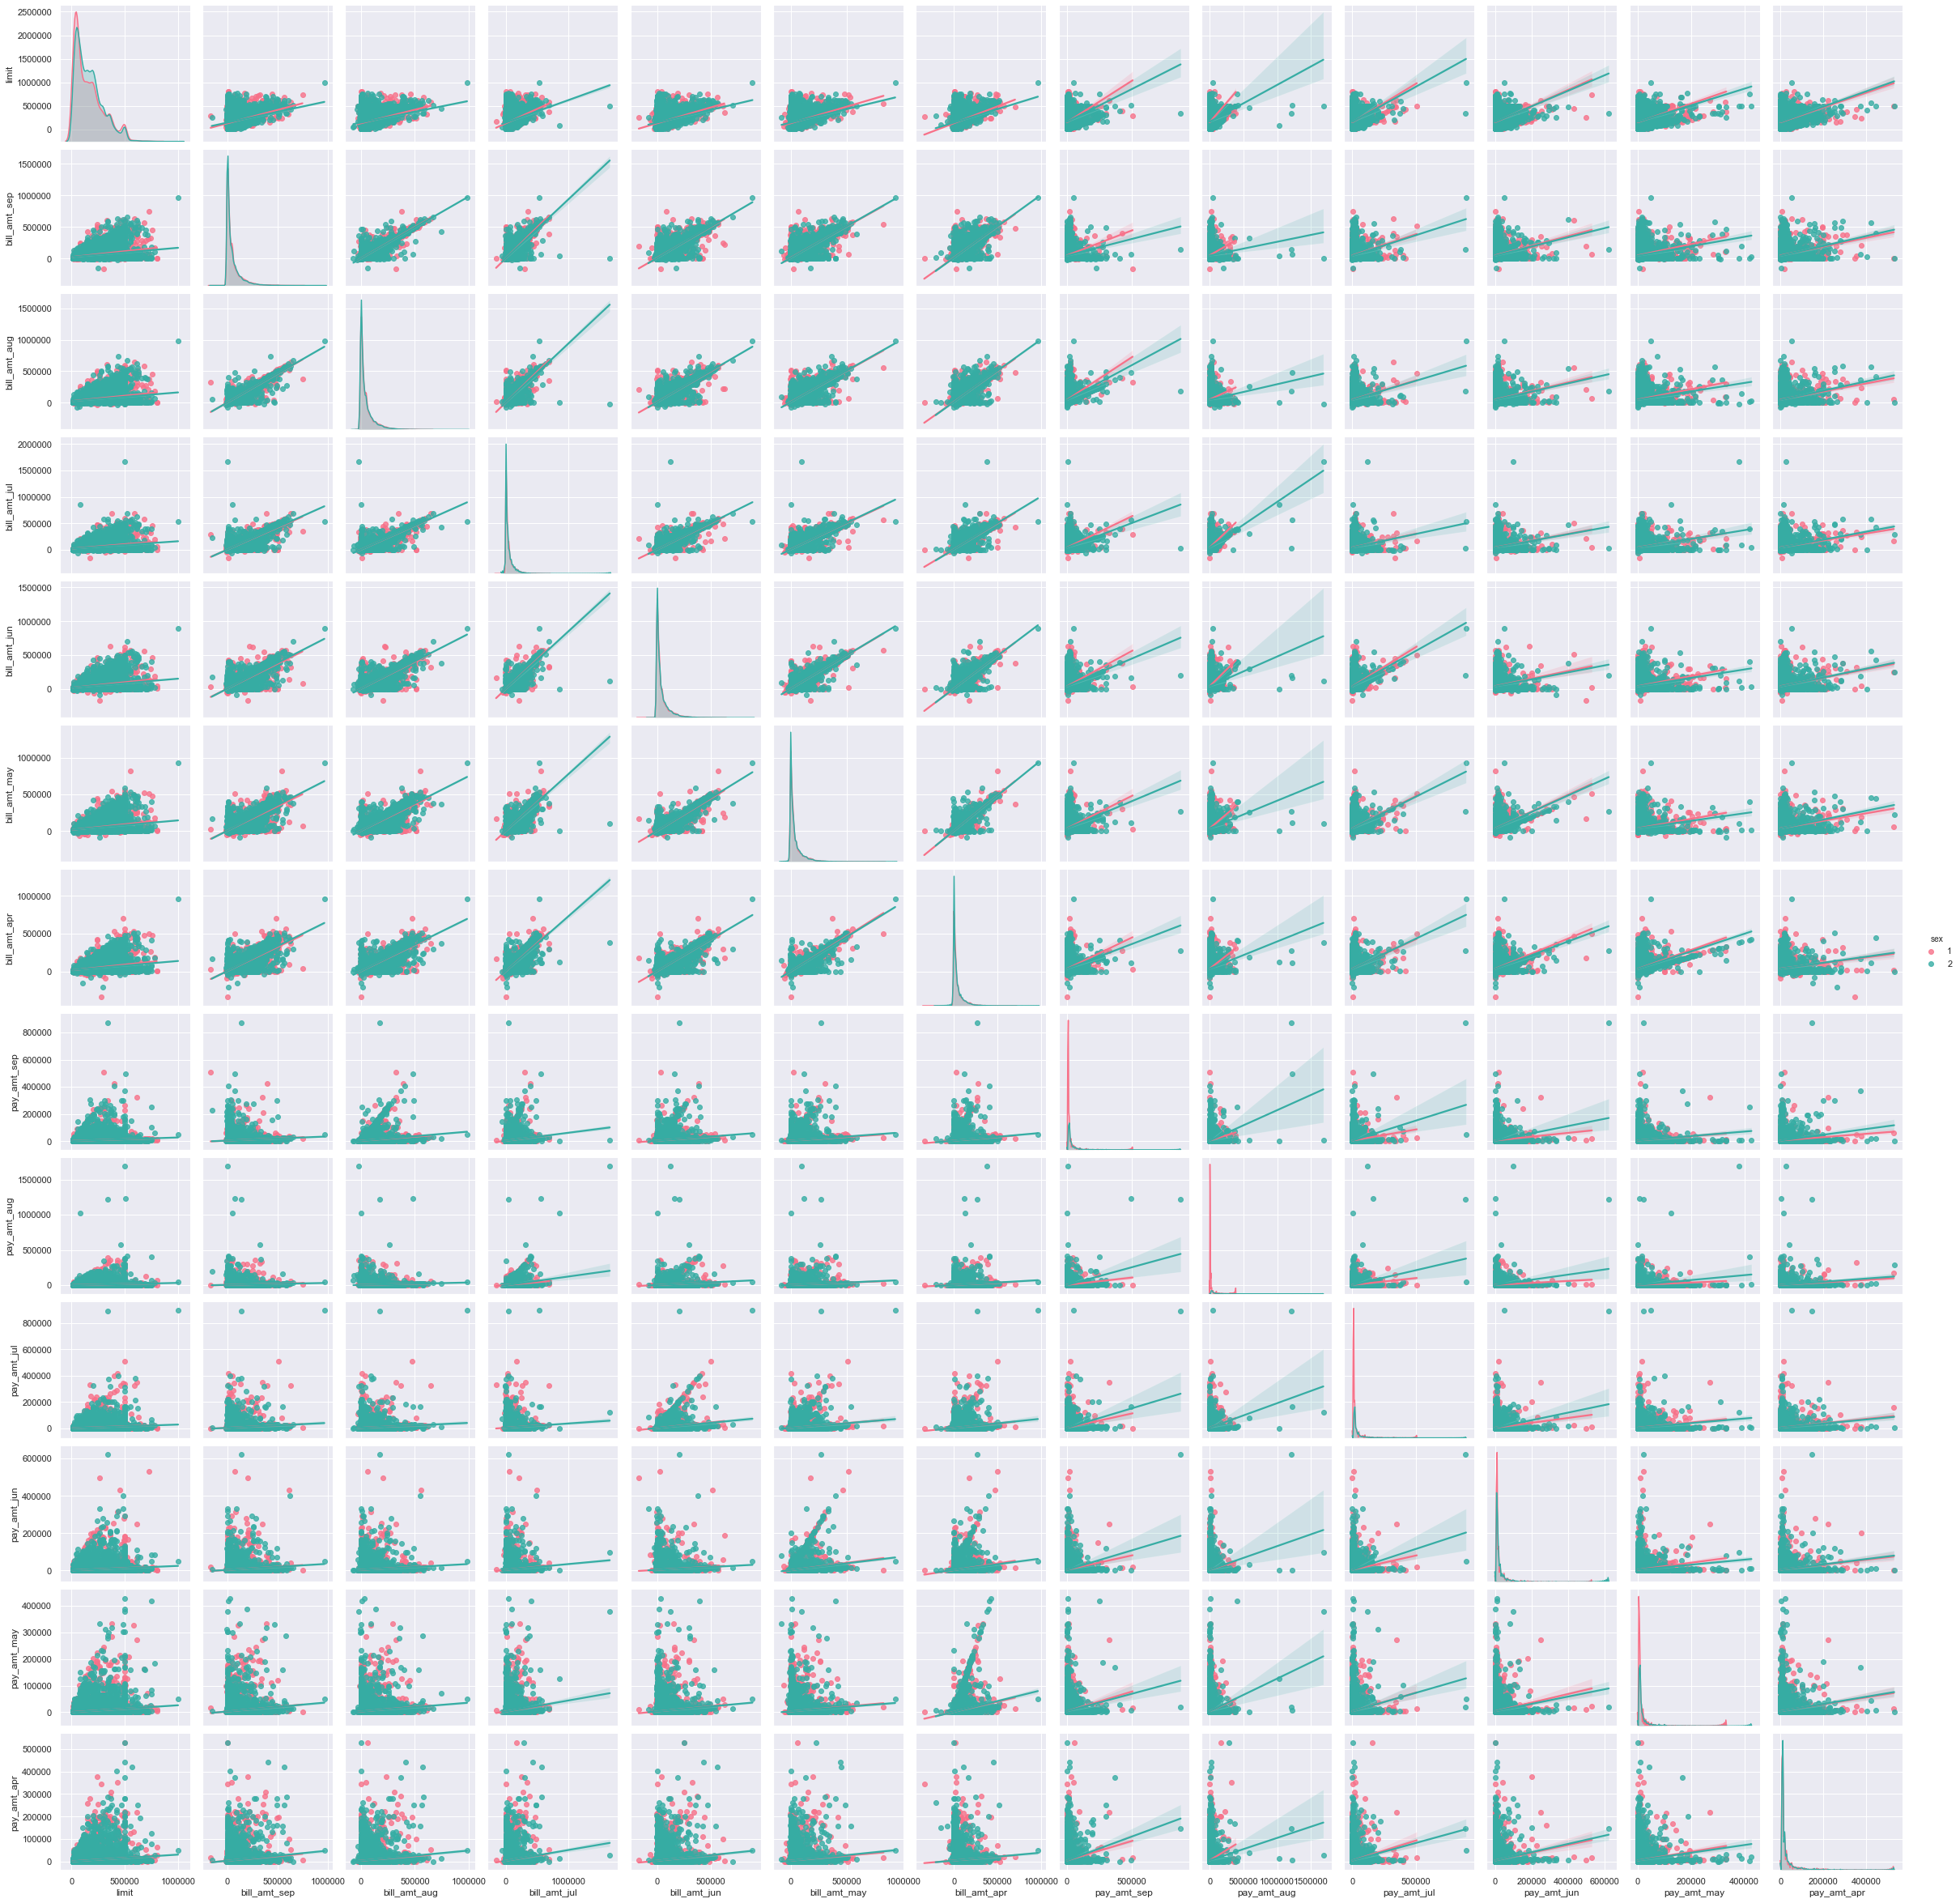

In [16]:
## Run pairplot to visualize relationships between bill and payment amounts
pp = sn.pairplot(credit, vars=['limit', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul',
       'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may',
       'pay_amt_apr'], hue='sex', palette='husl', kind='reg')

Several of the pairplots, e.g. "bill_amt_apr" and "pay_amt_may" indicate that there may be a trend  or correlation between payment amounts and the billed amount for the previous month. This suggests that a portion of the customer base pays off their bill in full every month. 

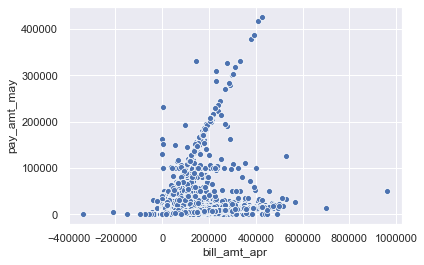

In [17]:
# Examine correlation between 'bill_amt_apr' and 'pay_amt_may'
sp = sn.scatterplot('bill_amt_apr', 'pay_amt_may', data=credit)

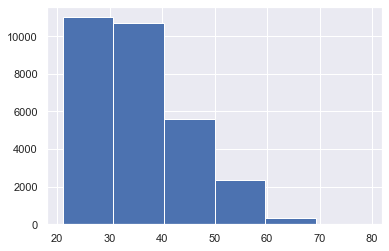

In [18]:
# Age distribution
plt.hist(credit['age'], bins=6)
plt.show()

Text(0.5, 1.0, 'Distribution of Customer Age')

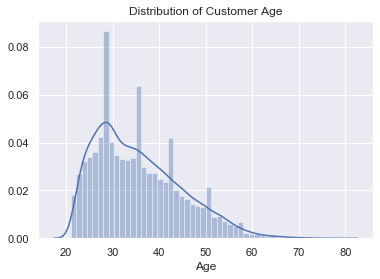

In [19]:
age_dist = sn.distplot(credit['age'], axlabel="Age")
age_dist.set_title("Distribution of Customer Age")

In [20]:
print('The average customer age is %0.f years and the median customer age is %0.f years.'%(credit.age.mean(), credit.age.median()))

The average customer age is 35 years and the median customer age is 34 years.


The age distribution is skewed towards the younger end of the spectrum. 

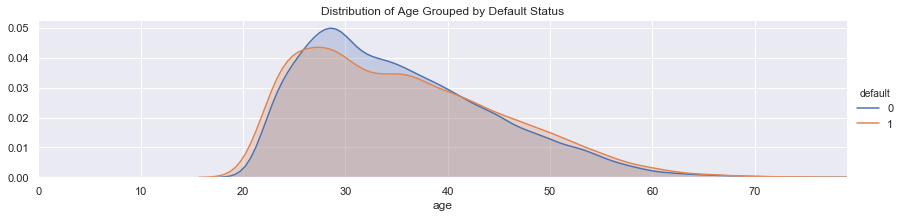

In [21]:
# Age by Default
def_age = sn.FacetGrid(credit, hue='default', aspect=4)
def_age.map(sn.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
def_age.set(xlim=(0, oldest))
def_age.set(title='Distribution of Age Grouped by Default Status')
def_age.add_legend()

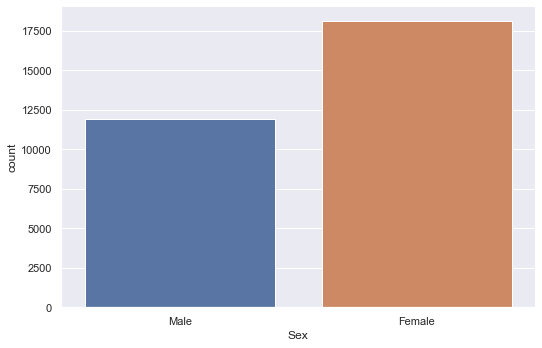

In [22]:
# Gender distribution
sex = sn.catplot('sex', data=credit, kind='count', aspect=1.5)
sex.set_xlabels('Sex')
sex.set_xticklabels(['Male', 'Female'])

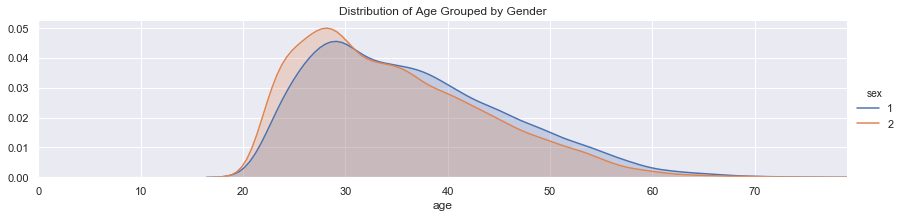

In [23]:
# Age by Gender
gen_age = sn.FacetGrid(credit, hue='sex', aspect=4)
gen_age.map(sn.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
gen_age.set(xlim=(0, oldest))
gen_age.set(title='Distribution of Age Grouped by Gender')
gen_age.add_legend()

In [24]:
is_male = credit['sex']==1
credit_male = credit[is_male]
print(credit_male.age.mean())

36.51943135935397


In [25]:
is_female = credit['sex']==2
credit_female = credit[is_female]
print(credit_female.age.mean())

34.806868374558306


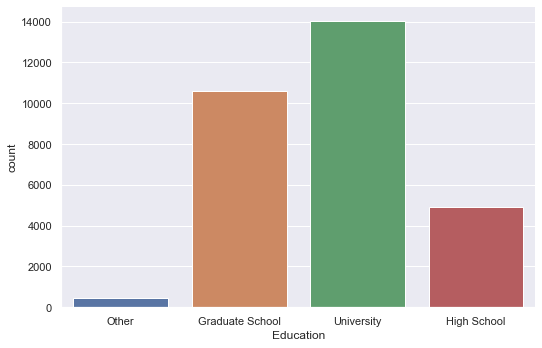

In [26]:
# Education distribution
edu = sn.catplot('education', data=credit, kind='count', aspect=1.5)
edu.set_xlabels('Education')
edu.set_xticklabels(['Other', 'Graduate School', 'University', 'High School'])

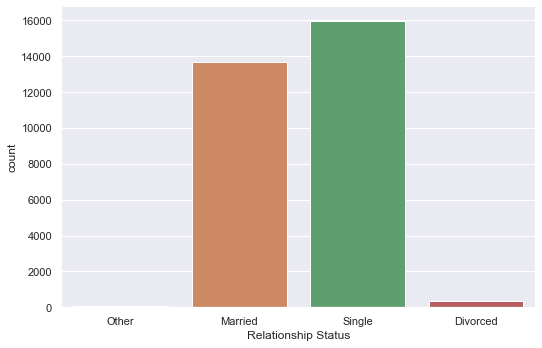

In [27]:
# Relationship status distribution
rel = sn.catplot('marriage', data=credit, kind='count', aspect=1.5)
rel.set_xlabels('Relationship Status')
rel.set_xticklabels(['Other', 'Married', 'Single', 'Divorced'])

In [28]:
# Check number of instances where relationship status is 'other'
(credit.marriage == 0).sum()

54

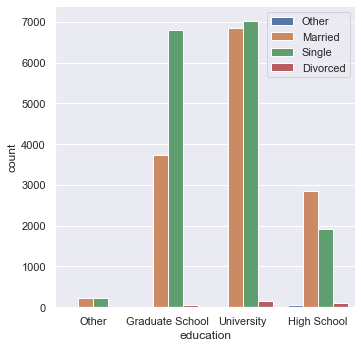

In [29]:
# Correlation between relationship status and education
rel_ed = sn.catplot('education', data=credit, kind='count', hue='marriage', legend=False)
rel_ed.set_xticklabels(['Other', 'Graduate School', 'University', 'High School'])
plt.legend(labels=['Other', 'Married', 'Single', 'Divorced'])

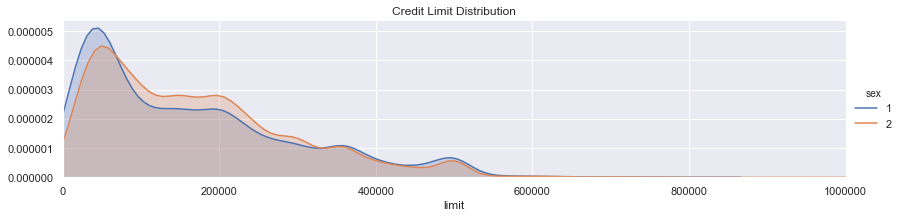

In [30]:
# Credit distribution
credit_kde = sn.FacetGrid(credit, hue='sex', aspect=4)
credit_kde.map(sn.kdeplot, 'limit', shade=True)
highest = credit['limit'].max()
credit_kde.set(xlim=(0, highest))
credit_kde.set(title='Credit Limit Distribution')
credit_kde.add_legend()

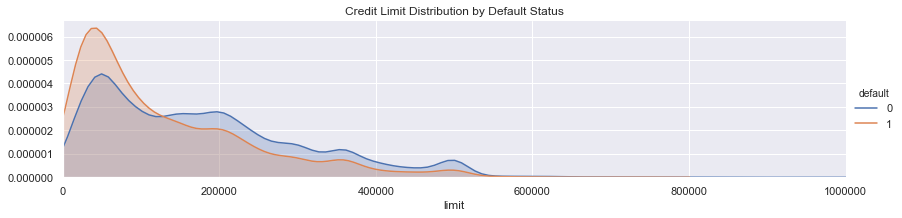

In [31]:
# Credit distribution by default 
credit_def = sn.FacetGrid(credit, hue='default', aspect=4)
credit_def.map(sn.kdeplot, 'limit', shade=True)
highest = credit['limit'].max()
credit_def.set(xlim=(0, highest))
credit_def.set(title='Credit Limit Distribution by Default Status')
credit_def.add_legend()

The majority of credit limit amounts are lower. By gender, the distribution shows that the trend is generally similar between men and women, however the data suggests that a larger proportion of men have lower credit limits. 

When broken down by default status, the data shows that customers who defaulted in general had a lower credit limit. 

[Text(0, 0, 'Did not default'), Text(0, 0, 'Default')]

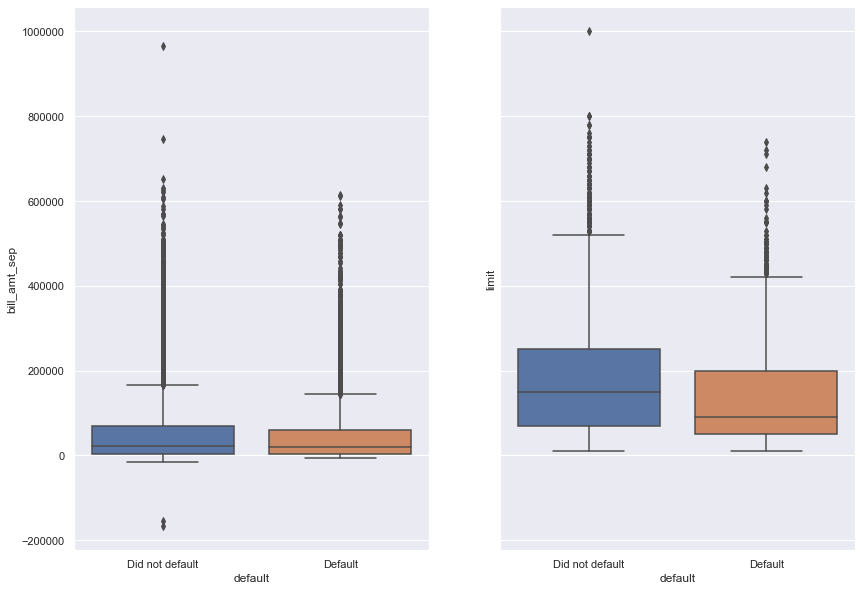

In [32]:
# Correlation of owed amounts by default 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14, 10))

def_cor = sn.boxplot(x='default', y='bill_amt_sep',data=credit, ax=ax1)
def_cor.set_xticklabels(['Did not default', 'Default'])

lim_cor = sn.boxplot(x='default', y='limit', data=credit, ax=ax2)
lim_cor.set_xticklabels(['Did not default', 'Default'])

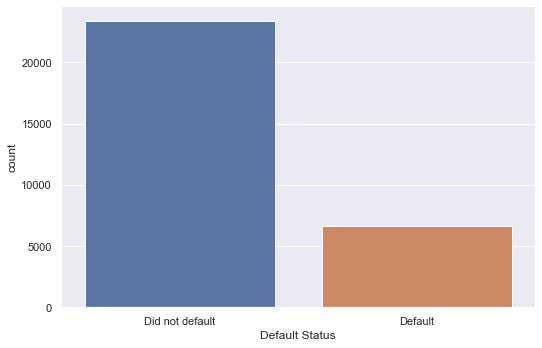

In [33]:
# Proportion of customers that defaulted
default = sn.catplot('default', data=credit, kind='count', aspect=1.5)
default.set_xlabels('Default Status')
default.set_xticklabels(['Did not default', 'Default'])

In [60]:
# Percentage of customers that defaulted
credit.default.sum()/len(credit.default)

0.2212

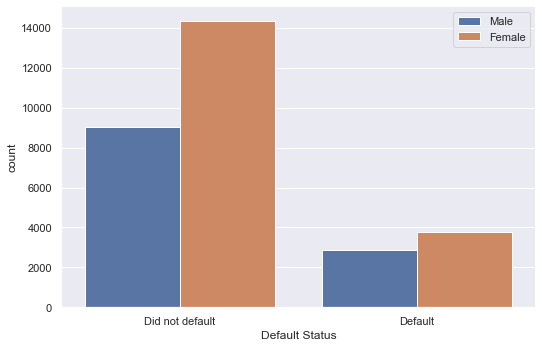

In [34]:
# Customers that defaulted by gender
default_sex = sn.catplot('default', data=credit, hue='sex', kind='count', aspect=1.5, legend=False)
default_sex.set_xlabels('Default Status')
default_sex.set_xticklabels(['Did not default', 'Default'])
plt.legend(labels=['Male', 'Female'])

In [35]:
# Are women or men more likely to default
pd.pivot_table(credit, values='age', index='sex', columns='default', aggfunc=pd.Series.count, margins=True)

default,0,1,All
sex,,,
1,9015,2873,11888
2,14349,3763,18112
All,23364,6636,30000


The proportion of women that defaulted is similar to the proportion of women in the data set (60%). Likewise, the proportion of men that defaulted is similar to the proportion of men in the dataset (40%).

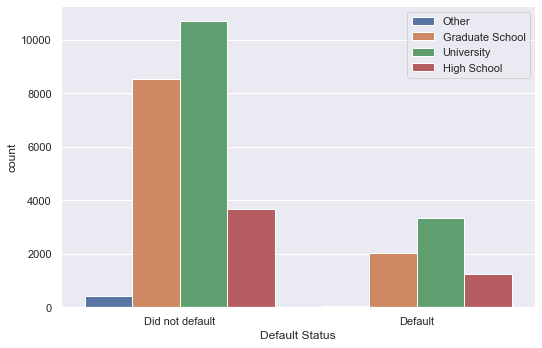

In [36]:
# Customers that defaulted by education
default_ed = sn.catplot('default', data=credit, hue='education', kind='count', aspect=1.5, legend=False)
default_ed.set_xlabels('Default Status')
default_ed.set_xticklabels(['Did not default', 'Default'])
plt.legend(labels=['Other', 'Graduate School', 'University', 'High School'])

In [37]:
# Is a certain education group more likely to default?
ed_perc = pd.pivot_table(credit, values='age', index='education', columns='default', aggfunc=pd.Series.count, margins=True)
print(ed_perc)

default        0     1    All
education                    
0            435    33    468
1           8549  2036  10585
2          10700  3330  14030
3           3680  1237   4917
All        23364  6636  30000


In [38]:
ed_perc/ed_perc.loc['All', :]

default,0,1,All
education,,,
0,0.018618,0.004973,0.015600
1,0.365905,0.306811,0.352833
2,0.457970,0.501808,0.467667
3,0.157507,0.186407,0.163900
All,1.000000,1.000000,1.000000


Customers with education level "Other" and "Graduate School" were slightly less likely to default whereas customers with "University" and "High School" levels were slightly more likely to default. 

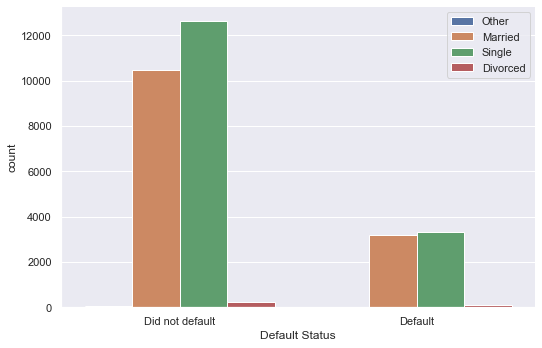

In [39]:
# Customers that defaulted by relationship status
default_rel = sn.catplot('default', data=credit, hue='marriage', kind='count', aspect=1.5, legend=False)
default_rel.set_xlabels('Default Status')
default_rel.set_xticklabels(['Did not default', 'Default'])
plt.legend(labels=['Other', 'Married', 'Single', 'Divorced'])

In [40]:
# Is a relationship type more likely to default?
rel_perc = pd.pivot_table(credit, values='age', index='marriage', columns='default', aggfunc=pd.Series.count, margins=True)
print(rel_perc)

default       0     1    All
marriage                    
0            49     5     54
1         10453  3206  13659
2         12623  3341  15964
3           239    84    323
All       23364  6636  30000


In [41]:
rel_perc/rel_perc.loc['All', :]

default,0,1,All
marriage,,,
0,0.002097,0.000753,0.001800
1,0.447398,0.483122,0.455300
2,0.540276,0.503466,0.532133
3,0.010229,0.012658,0.010767
All,1.000000,1.000000,1.000000


Overall, married and divorced customers are more likely to default whereas single customers are less likely to default. 

In [42]:
# Do customers have consistent payment history
history = credit[['pay_hist_sep', 'pay_hist_aug', 'pay_hist_jul', 'pay_hist_jun', 'pay_hist_may', 'pay_hist_apr']]
history.head()

,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [43]:
(history == -1) | (history == -2)

,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr
0,False,False,True,True,True,True
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,False,True,False,False,False
...,...,...,...,...,...,...
29995,False,False,False,False,False,False
29996,True,True,True,True,False,False
29997,False,False,False,True,False,False
29998,False,True,False,False,False,True


In [44]:
paid_ind = ((history == -1) | (history == -2)).all(axis=1)

In [45]:
credit['behavior_type'] = None

In [46]:
credit.loc[paid_ind , 'behavior_type'] = 'paid'

In [47]:
credit.loc[credit['behavior_type'] == 'paid', :] 

,limit,sex,education,marriage,age,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,behavior_type
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,paid
21,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1,paid
23,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1,paid
28,50000,2,3,1,47,-1,-1,-1,-1,-1,-1,650,3415,3416,2040,30430,257,3415,3421,2044,30430,257,0,0,paid
30,230000,2,1,2,27,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,17270,13281,15339,14307,37292,0,0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29983,20000,1,2,1,44,-2,-2,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720,2890,9263,1824,1701,0,paid
29984,30000,1,2,2,38,-1,-1,-2,-1,-1,-1,315,923,2939,1993,1907,3319,923,2977,1999,3057,3319,1000,0,paid
29985,240000,1,1,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,paid
29986,360000,1,1,2,35,-1,-1,-2,-2,-2,-2,2220,0,0,0,0,0,0,0,0,0,0,0,0,paid


In [48]:
paid_ind2 = (history <= 0).all(axis=1) & (history == 0).any(axis=1)
credit.loc[paid_ind2, 'behavior_type'] = 'revolving'
credit.loc[credit['behavior_type'] == 'revolving', :]

,limit,sex,education,marriage,age,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,behavior_type
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,revolving
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,revolving
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,revolving
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,revolving
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,revolving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0,revolving
29993,100000,1,1,2,38,0,-1,-1,0,0,0,3042,1427,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000,0,revolving
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,revolving
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,revolving


In [49]:
# Define function to label payment behavior
def pick_behavior(row):
    pmt_history = row[['pay_hist_sep', 'pay_hist_aug', 'pay_hist_jul', 'pay_hist_jun', 'pay_hist_may', 'pay_hist_apr']]
    if ((pmt_history == -1) | (pmt_history == -2)).all():
        return "on time"
    elif ((pmt_history <= 0).all() & (pmt_history == 0).any()):
        return "revolving"
    elif ((pmt_history['pay_hist_sep']) > (pmt_history['pay_hist_apr'])):
        return "more late"
    elif ((pmt_history['pay_hist_sep']) < (pmt_history['pay_hist_apr'])):
        return "less late"
    else:
        return "other"


In [50]:
# Assign strings to behavior column 
credit['behavior_type'] = credit.apply(pick_behavior, axis=1)

In [51]:
credit.head()

,limit,sex,education,marriage,age,pay_hist_sep,pay_hist_aug,pay_hist_jul,pay_hist_jun,pay_hist_may,pay_hist_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,behavior_type
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,more late
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,less late
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,revolving
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,revolving
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,revolving


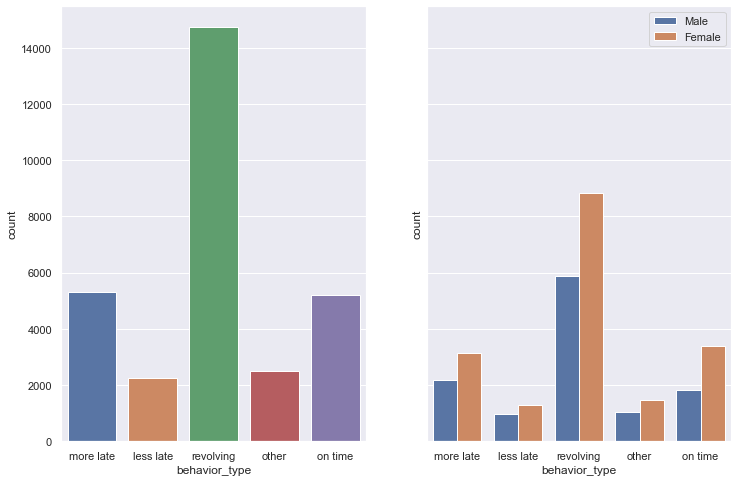

In [52]:
# Plot distribution of behavior 
fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=True, figsize=(12, 8))

beh = sn.countplot('behavior_type', data=credit, ax=ax3)
beh_sex = sn.countplot('behavior_type', data=credit, hue='sex', ax=ax4)
plt.legend(labels=['Male', 'Female'])

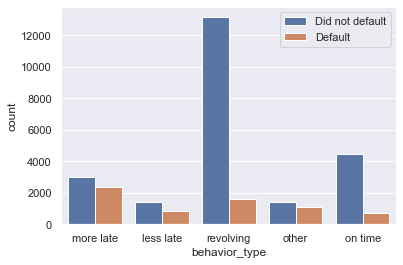

In [53]:
# Impact of behavior on default status
beh_def = sn.countplot('behavior_type', data=credit, hue='default')
plt.legend(labels=['Did not default', 'Default'])

Customers who demonstrated a payment behavior of greater delayed payments are more likely to default than customers who improved their payment behavior from Apr to Sep. 

Customers who demonstrated a behavior of "revolving credit" have a higher likelihood of defaulting than customers who paid their bill in full every month.